# EWZ Regression

The purpose of this exercise is to walk you through a linear regression.  In particular, you will regress weekly EWZ returns against weekly changes in EWZ implied volatility.  This is very similar to the first regression in Tutorial 19.  The idea is for you to work through a similar regression, but with different data.

#### 1) Import the packages that you think you will need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

/var/folders/79/6xh3y3cd7kl6qqpcykmzhz8r0000gn/T/ipykernel_36314/2455923721.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### 2) Read in the data in `ewz_2014_2018.csv` and assign it to a variable `df_ewz`.

In [2]:
df_ewz = pd.read_csv('/Users/yuanhanlim/Desktop/DS & ML/03_ewz_regression/ewz_2014_2018_regression.csv')
df_ewz.head()  # Check the first few rows to ensure the data loaded correctly

,underlying,start_date,end_date,realized_vol,ret,start_iv
0,EWZ,2014-01-03,2014-01-10,0.196240,-0.017186,0.236235
1,EWZ,2014-01-10,2014-01-17,0.121560,-0.011308,0.230431
2,EWZ,2014-01-17,2014-01-24,0.298007,-0.054528,0.214747
3,EWZ,2014-01-24,2014-01-31,0.195339,-0.018432,0.314414
4,EWZ,2014-01-31,2014-02-07,0.411154,0.035056,0.302819


#### 3) Create a new column in `df_ewz` and call it `iv_change`.  Populate this new column with the change in `start_iv` from the current period to the next period.

In [3]:
df_ewz['iv_change'] = df_ewz['start_iv'].diff(-1)
df_ewz.dropna(subset=['iv_change'], inplace=True)
df_ewz.head()  # Check to ensure the new column is populated

,underlying,start_date,end_date,realized_vol,ret,start_iv,iv_change
0,EWZ,2014-01-03,2014-01-10,0.196240,-0.017186,0.236235,0.005803
1,EWZ,2014-01-10,2014-01-17,0.121560,-0.011308,0.230431,0.015684
2,EWZ,2014-01-17,2014-01-24,0.298007,-0.054528,0.214747,-0.099667
3,EWZ,2014-01-24,2014-01-31,0.195339,-0.018432,0.314414,0.011595
4,EWZ,2014-01-31,2014-02-07,0.411154,0.035056,0.302819,0.008644


#### 4) Create a scatter plot of `ret` vs `iv_change`.  Would you say this graph is more or less noisy that the one for SPY in Tutorial 19?

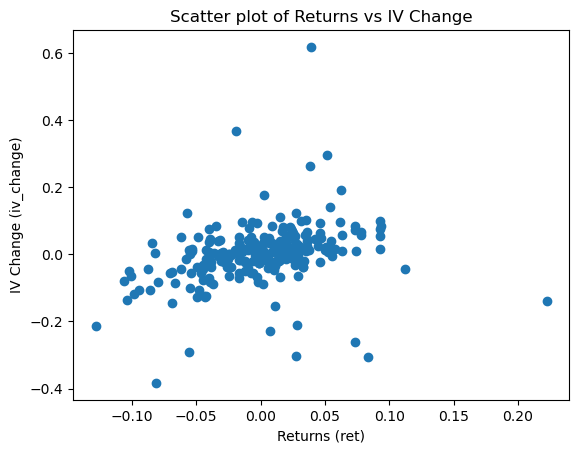

In [4]:
plt.scatter(df_ewz['ret'], df_ewz['iv_change'])
plt.xlabel('Returns (ret)')
plt.ylabel('IV Change (iv_change)')
plt.title('Scatter plot of Returns vs IV Change')
plt.show()##

#### It is more noisy than the one for SPY

#### 5) Fit a `LinearRegression` to our data, with `ret` at the feature and `iv_change` as the label.  This will involve three steps: 

a. Instantiate a LinearRegression object, call it `iv_model`.

b. Isolate the training data to fit the model with.

c. Fit the model by using `iv_model.fit()`.

In [5]:
iv_model = LinearRegression()
X_train = df_ewz[['ret']].values  # Features (returns)
y_train = df_ewz['iv_change'].values  # Label (IV change)
iv_model.fit(X_train, y_train)

LinearRegression()

#### 6) Calculate the $R^2$ of this model on the training data.  How does this compare to SPY?  Is this consistent with your answer to #4.

In [6]:
r_squared = iv_model.score(X_train, y_train)
print(f"R^2 for EWZ data: {r_squared}")

R^2 for EWZ data: 0.08286231382299258


####  The R-Square is lower than then one for SPY